In [2]:
import pandas as pd
import numpy as np

subpath = "agg_function_periodic_experiment_y_original_tptt/2024-12-04T17:03:31"
data = pd.read_csv(f'{subpath}/total_X.csv')


In [3]:
data.drop(columns=['Unnamed: 7'], inplace=True)

In [4]:
group = data.groupby(["período", "função", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [5]:
group['std'] = round(100* group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [6]:
group

,período,função,método,mean,std
0,2,máximo,RF,10.0,2.0
1,2,máximo,RT,10.0,1.0
2,2,média,RF,12.0,2.0
3,2,média,RT,12.0,3.0
4,2,mínimo,RF,14.0,3.0
5,2,mínimo,RT,14.0,3.0
6,4,máximo,RF,13.0,3.0
7,4,máximo,RT,12.0,3.0
8,4,média,RF,14.0,2.0
9,4,média,RT,16.0,4.0


<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_6959/1043025964.py:11: SyntaxWarning: invalid escape sequence '\p'
  lambda row: f"{round(100 * row['mean_nmae']):.0f} \pm {round(100*row['std_nmae']):.0f}", axis=1
/tmp/ipykernel_6959/1043025964.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="período", y="mean_nmae", hue="método", data=results, ci="sd", palette="muted")


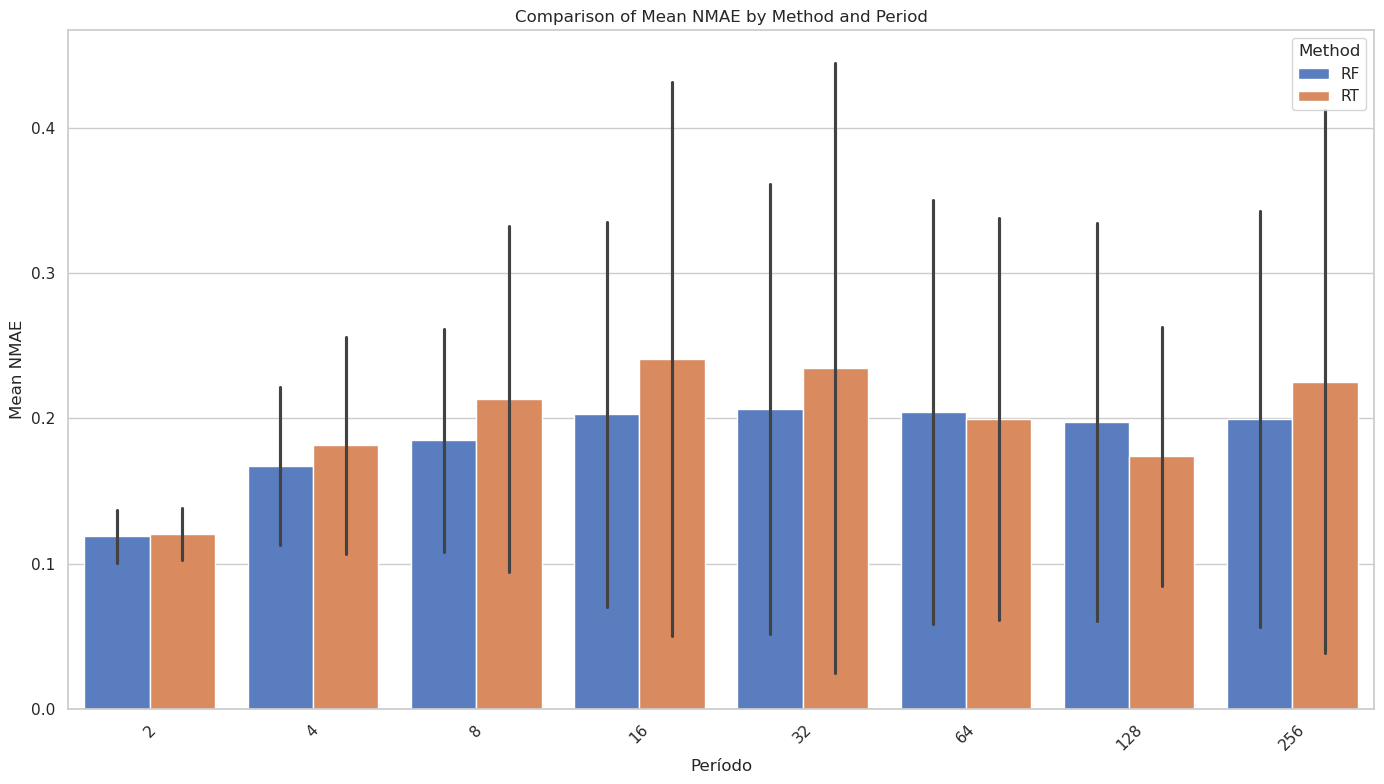

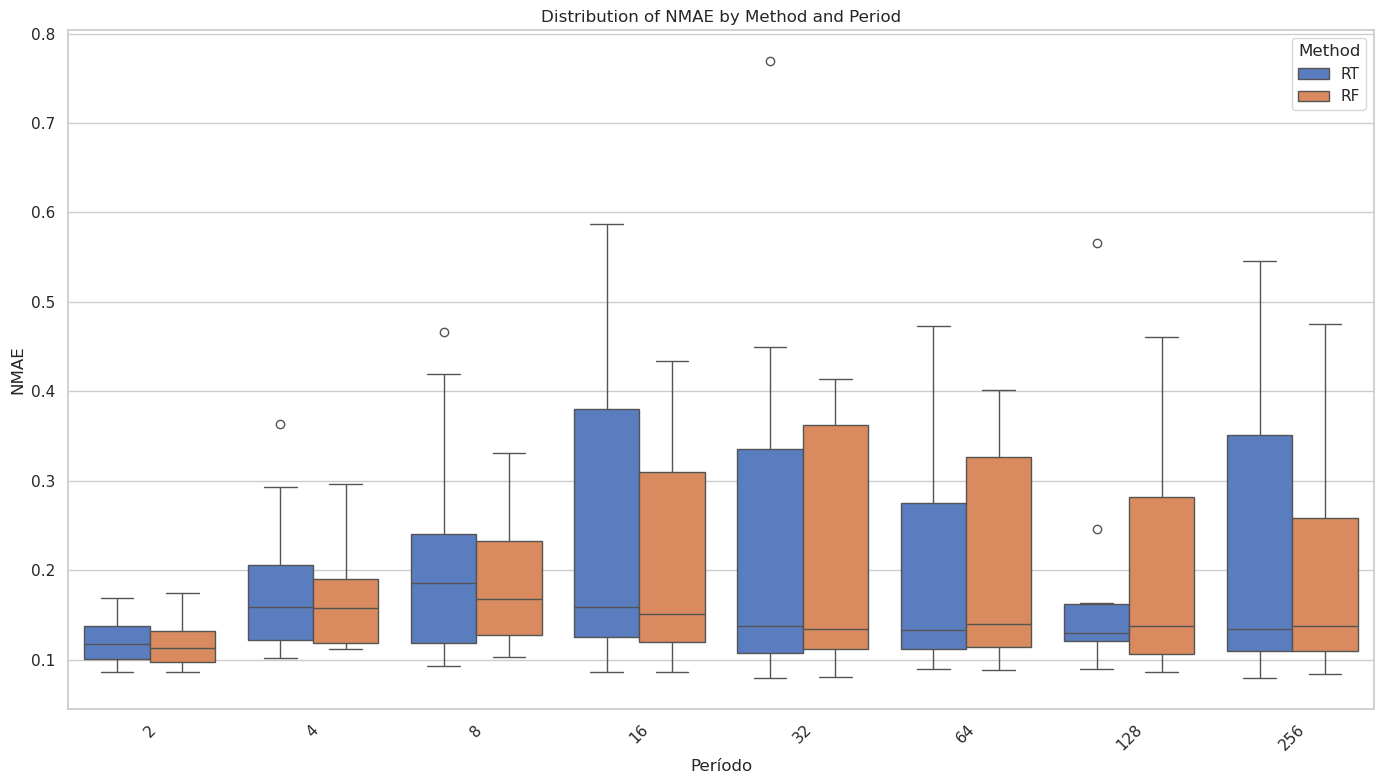

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

results = (
    data.groupby(["período", "função", "método"])
    .agg(mean_nmae=("nmae", "mean"), std_nmae=("nmae", "std"))
    .reset_index()
)

results["nmae_pm"] = results.apply(
    lambda row: f"{round(100 * row['mean_nmae']):.0f} \pm {round(100*row['std_nmae']):.0f}", axis=1
)

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.barplot(x="período", y="mean_nmae", hue="método", data=results, ci="sd", palette="muted")

plt.xlabel("Período")
plt.ylabel("NMAE Médio")
plt.title("Comparação do NMAE Médio por Método e Período")
plt.legend(title="Método")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x="período", y="nmae", hue="método", data=data, palette="muted")

plt.xlabel("Período")
plt.ylabel("NMAE")
plt.title("Distribuição do NMAE por Método e Período")
plt.legend(title="Método")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_6959/2562919124.py:10: SyntaxWarning: invalid escape sequence '\p'
  lambda row: f"{round(100 * row['mean_nmae']):.0f} \pm {round(100*row['std_nmae']):.0f}", axis=1
/tmp/ipykernel_6959/2562919124.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="período", y="mean_nmae", hue="método", data=results_without_min, ci="sd", palette="muted")


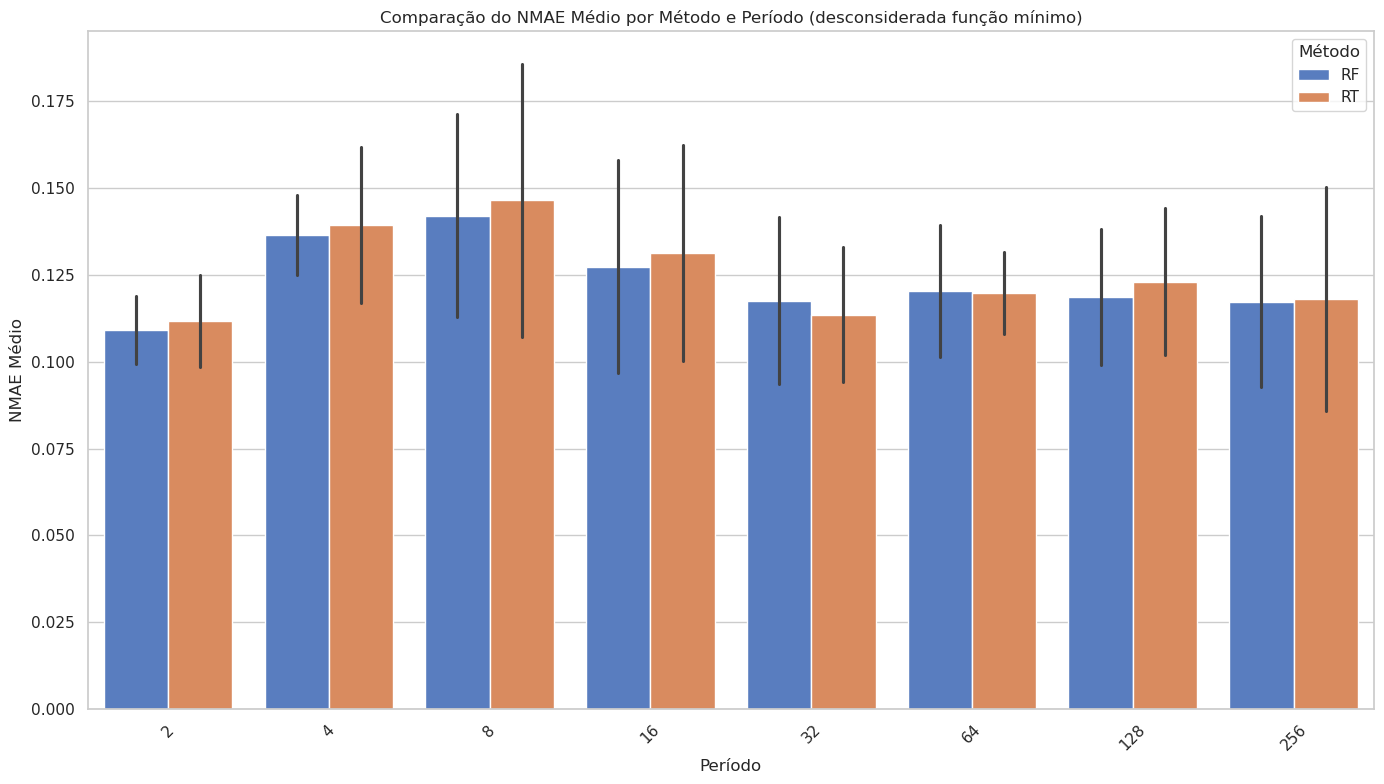

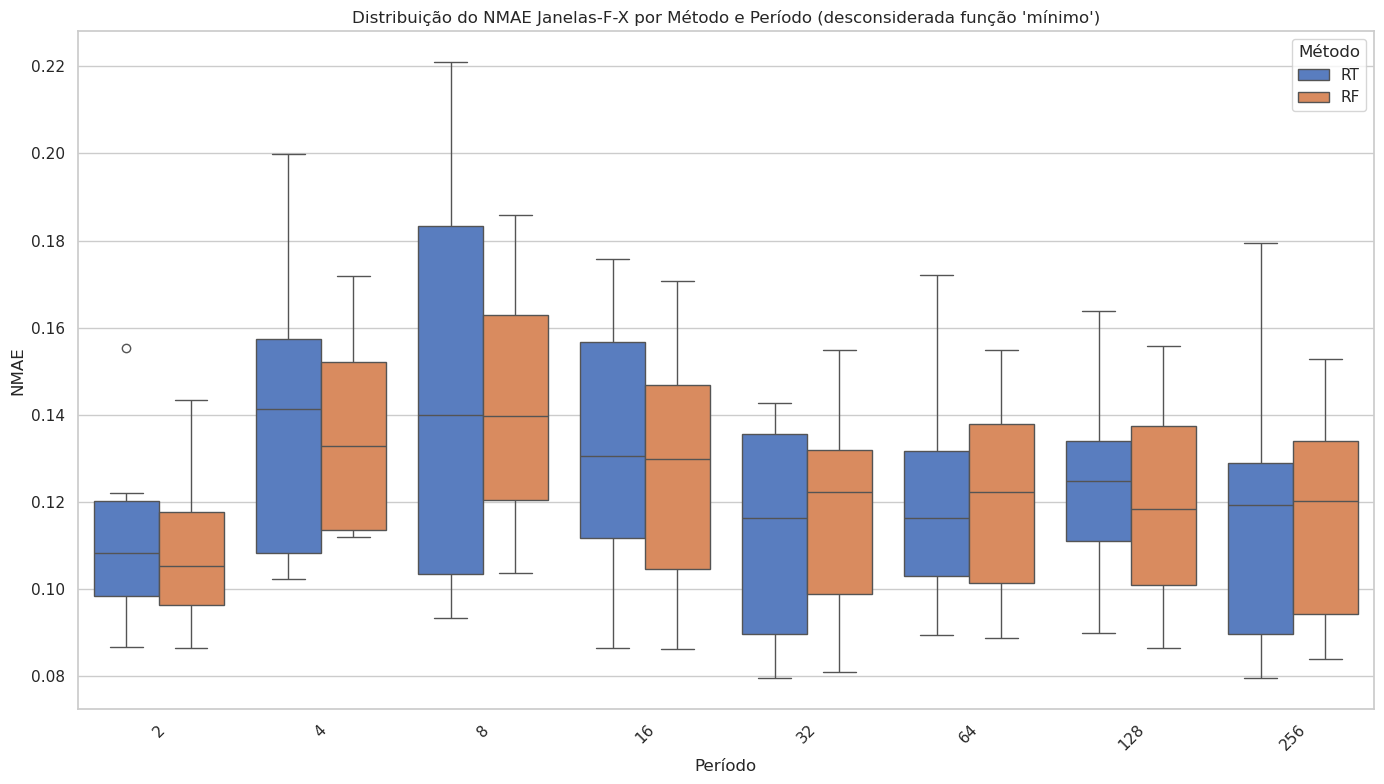

In [14]:
data_without_min = data[data["função"] != "mínimo"]

results_without_min = (
    data_without_min.groupby(["período", "função", "método"])
    .agg(mean_nmae=("nmae", "mean"), std_nmae=("nmae", "std"))
    .reset_index()
)

results_without_min["nmae_pm"] = results_without_min.apply(
    lambda row: f"{round(100 * row['mean_nmae']):.0f} \pm {round(100*row['std_nmae']):.0f}", axis=1
)

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.barplot(x="período", y="mean_nmae", hue="método", data=results_without_min, ci="sd", palette="muted")

plt.xlabel("Período")
plt.ylabel("NMAE Médio")
plt.title("Comparação do NMAE Médio por Método e Período (desconsiderada função mínimo)")
plt.legend(title="Método")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x="período", y="nmae", hue="método", data=data_without_min, palette="muted")

plt.xlabel("Período")
plt.ylabel("NMAE")
plt.title("Distribuição do NMAE Janelas-F-X por Método e Período (desconsiderada função 'mínimo')")
plt.legend(title="Método")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

/usr/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:378: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:378: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:378: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:378: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:378: RuntimeWarning: invalid value encountered in sqrt


Período,Função,Característica,Score
2,máximo,3_ldavg.1,4159.542384161421
2,mínimo,3_ldavg.1,5908.9209402755405
2,média,3_ldavg.1,5669.646849027509
4,máximo,4_pgfree.s,1563.0971551608345
4,mínimo,3_orq.s,4191.619979006239
4,média,3_ldavg.1,3596.731432947488
8,máximo,4_all_..sys,435.1560466713402
8,mínimo,3_orq.s,3966.7111536654984
8,média,3_runq.sz,2840.443025455229
16,máximo,4_frmpg.s,13.749439085497848
16,mínimo,3_orq.s,3867.1561996817986
16,média,3_runq.sz,2916.827553598799
32,máximo,1_cpu5_.soft,191.3353500432164
32,mínimo,3_orq.s,2792.9416180694825
32,média,3_runq.sz,2099.246553357245
64,máximo,1_cpu5_.soft,94.83737024221416
64,mínimo,3_runq.sz,1543.1640934466639
64,média,3_orq.s,1371.2397520979534
128,máximo,1_cpu5_.soft,46.67474048442874
128,mínimo,3_runq.sz,762.3682319914084
128,média,3_orq.s,822.9842999539015
256,máximo,0_eth1_.ifutil,24.926265741501812
256,mínimo,4_ldavg.1,355.07976508667383
256,média,3_orq.s,473.846087744001



/tmp/ipykernel_6959/1354856899.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(best_features.keys()), y=list(best_features.values()), palette="muted")


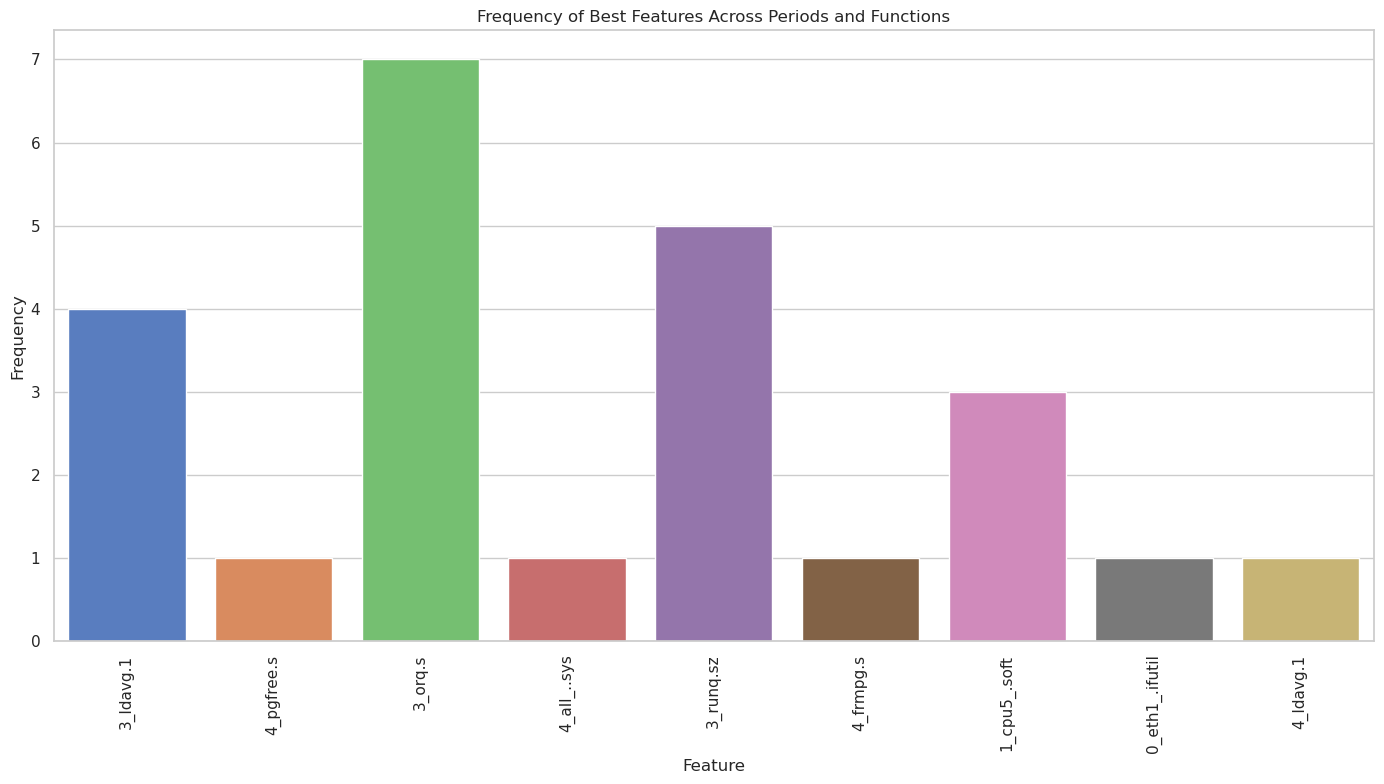

In [28]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

subpath = "agg_function_periodic_dataset/"
periods = [2, 4, 8, 16, 32, 64, 128, 256]
functions = ["máximo", "mínimo", "média"]

best_features = {}
result = 'Período,Função,Característica,Score\n'

for period in periods:
    for func in functions:
        x_path = f'{subpath}X_VoD-SingleApp-PeriodicLoad_P-{period}_{func}_total.csv'
        y_path = f'{subpath}Y_VoD-SingleApp-PeriodicLoad_P-{period}_{func}_total.csv'
        x_filtered = pd.read_csv(x_path)
        y_filtered = pd.read_csv(y_path)

        selector = SelectKBest(score_func=f_regression, k=1)
        selector.fit(x_filtered, y_filtered['DispFrames'])
        
        feature_scores = selector.scores_
        feature_names = x_filtered.columns
        feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
        
        feature_scores_df.sort_values(by='Score', ascending=False, inplace=True)
        
        best_feature_name = feature_scores_df['Feature'].iloc[0]
        best_feature_score = feature_scores_df['Score'].iloc[0]

        result += f'{period},{func},{best_feature_name},{best_feature_score}\n'

        best_features.setdefault(best_feature_name, 0)
        best_features[best_feature_name] += 1


Período,Função,Característica,Score
2,máximo,3_ldavg.1,4159.542384161421
2,mínimo,3_ldavg.1,5908.9209402755405
2,média,3_ldavg.1,5669.646849027509
4,máximo,4_pgfree.s,1563.0971551608345
4,mínimo,3_orq.s,4191.619979006239
4,média,3_ldavg.1,3596.731432947488
8,máximo,4_all_..sys,435.1560466713402
8,mínimo,3_orq.s,3966.7111536654984
8,média,3_runq.sz,2840.443025455229
16,máximo,4_frmpg.s,13.749439085497848
16,mínimo,3_orq.s,3867.1561996817986
16,média,3_runq.sz,2916.827553598799
32,máximo,1_cpu5_.soft,191.3353500432164
32,mínimo,3_orq.s,2792.9416180694825
32,média,3_runq.sz,2099.246553357245
64,máximo,1_cpu5_.soft,94.83737024221416
64,mínimo,3_runq.sz,1543.1640934466639
64,média,3_orq.s,1371.2397520979534
128,máximo,1_cpu5_.soft,46.67474048442874
128,mínimo,3_runq.sz,762.3682319914084
128,média,3_orq.s,822.9842999539015
256,máximo,0_eth1_.ifutil,24.926265741501812
256,mínimo,4_ldavg.1,355.07976508667383
256,média,3_orq.s,473.846087744001



/tmp/ipykernel_6959/1366084321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(best_features.keys()), y=list(best_features.values()), palette="muted")


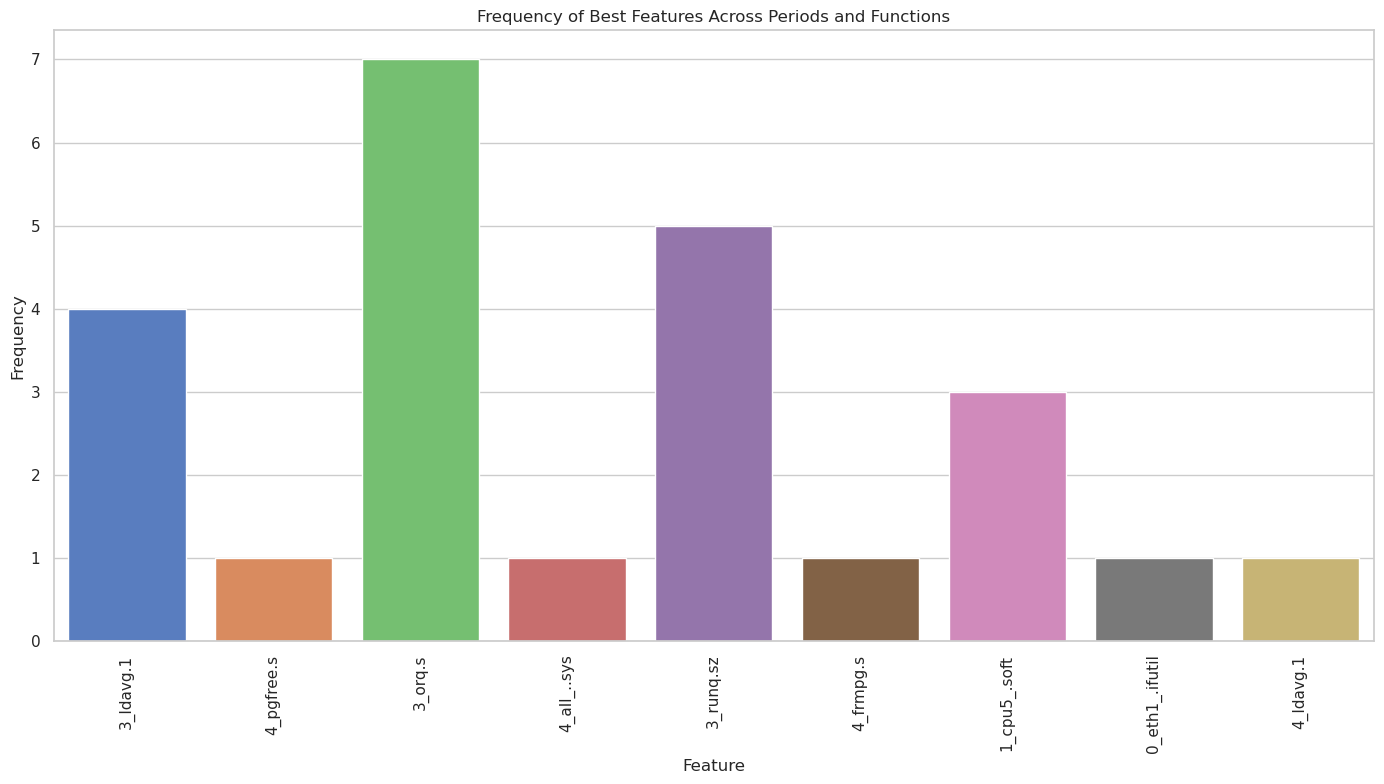

In [29]:

print(result)

plt.figure(figsize=(14, 8))
sns.barplot(x=list(best_features.keys()), y=list(best_features.values()), palette="muted")
plt.xlabel("Feature")
plt.ylabel("Frequency")
plt.title("Frequency of Best Features Across Periods and Functions")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

subpath = "agg_function_periodic_dataset/"
periods = [2, 4, 8, 16, 32, 64, 128, 256]
functions = ["máximo", "média"]

best_features_analysis = {}
result_analysis = 'Período,Função,Característica,Score\n'

for period in periods:
    for func in functions:
        x_path = f'{subpath}X_VoD-SingleApp-PeriodicLoad_P-{period}_{func}_total.csv'
        y_path = f'{subpath}Y_VoD-SingleApp-PeriodicLoad_P-{period}_{func}_total.csv'
        x_filtered = pd.read_csv(x_path)
        y_filtered = pd.read_csv(y_path)

        selector = SelectKBest(score_func=f_regression, k=1)
        selector.fit(x_filtered, y_filtered['DispFrames'])
        
        feature_scores = selector.scores_
        feature_names = x_filtered.columns
        feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
        
        feature_scores_df.sort_values(by='Score', ascending=False, inplace=True)
        
        best_feature_name = feature_scores_df['Feature'].iloc[0]
        best_feature_score = feature_scores_df['Score'].iloc[0]

        result_analysis += f'{period},{func},{best_feature_name},{best_feature_score}\n'

        best_features_analysis.setdefault(best_feature_name, 0)
        best_features_analysis[best_feature_name] += 1


/usr/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:378: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:378: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:378: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:378: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/usr/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:378: RuntimeWarning: invalid value encountered in sqrt


Período,Função,Característica,Score
2,máximo,3_ldavg.1,4159.542384161421
2,média,3_ldavg.1,5669.646849027509
4,máximo,4_pgfree.s,1563.0971551608345
4,média,3_ldavg.1,3596.731432947488
8,máximo,4_all_..sys,435.1560466713402
8,média,3_runq.sz,2840.443025455229
16,máximo,4_frmpg.s,13.749439085497848
16,média,3_runq.sz,2916.827553598799
32,máximo,1_cpu5_.soft,191.3353500432164
32,média,3_runq.sz,2099.246553357245
64,máximo,1_cpu5_.soft,94.83737024221416
64,média,3_orq.s,1371.2397520979534
128,máximo,1_cpu5_.soft,46.67474048442874
128,média,3_orq.s,822.9842999539015
256,máximo,0_eth1_.ifutil,24.926265741501812
256,média,3_orq.s,473.846087744001



/tmp/ipykernel_6959/3961616567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(best_features_analysis.keys()), y=list(best_features_analysis.values()), palette="muted")


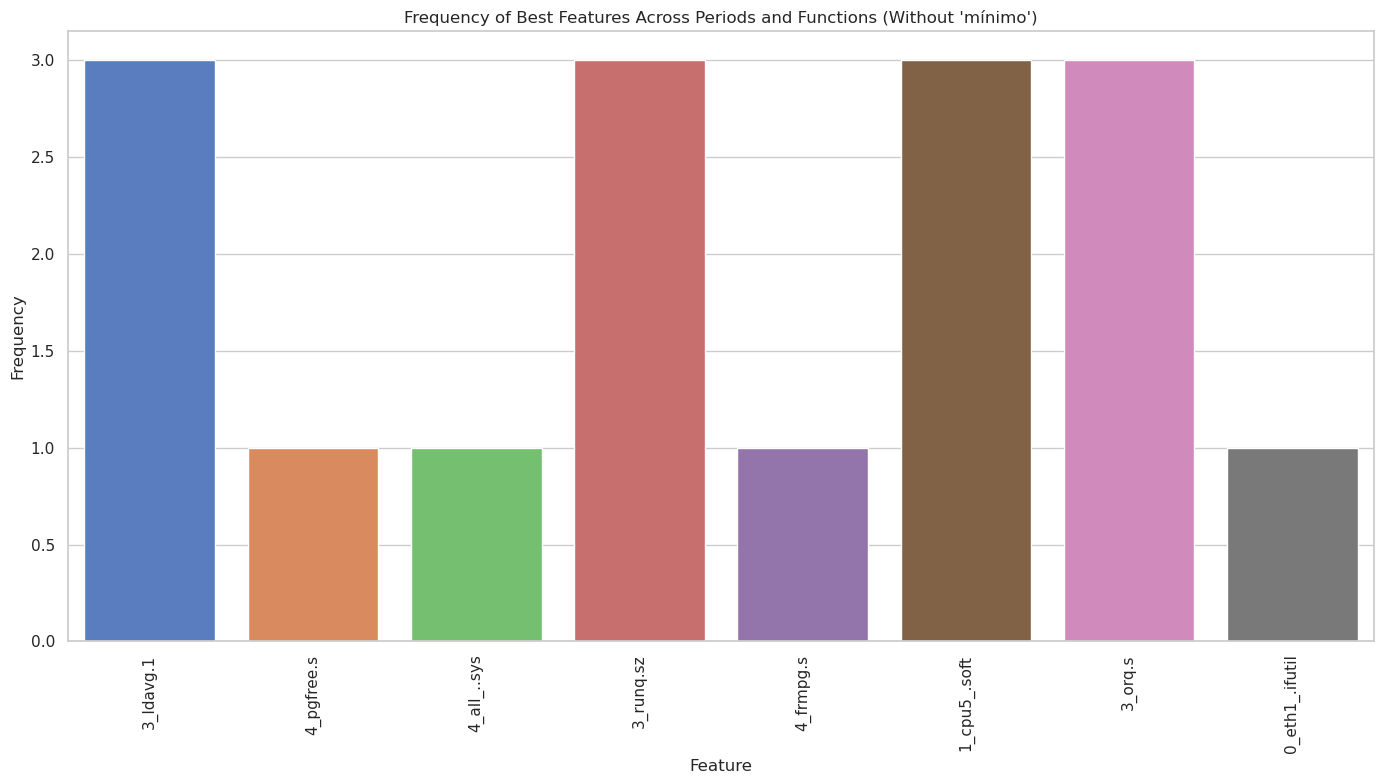

In [31]:

print(result_analysis)

plt.figure(figsize=(14, 8))
sns.barplot(x=list(best_features_analysis.keys()), y=list(best_features_analysis.values()), palette="muted")
plt.xlabel("Feature")
plt.ylabel("Frequency")
plt.title("Frequency of Best Features Across Periods and Functions (Without 'mínimo')")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()